# Google Colab Lab Assignment -YOLO 11 Model

**Course Name:** PEC Deep Learning

**Lab Title:** YOLOv11 for drowsiness-detection-2 dataset

**Student Name:** Harshad Jadhav

**Student ID:** 202201040081

**Date of Submission:** 26/03/2025



**Objective**
The purpose of this lab is to understand and implement YOLOv11 for real-time object detection. Students will perform dataset preparation, model implementation, inference, and performance evaluation.

**Dataset Link :** https://universe.roboflow.com/godstime-olukaejor-ys11d/drowsiness-detection-w65rx/dataset/2



# **Task 1: Environment Setup and YOLOv11 Installation**
**Objective:**  
Set up the required libraries and dependencies to run YOLOv11.

**Steps:**  
1. **Install Python Libraries:**  
   Install required libraries using pip: `roboflow` and `ultralytics` (which includes PyTorch, OpenCV, etc.).  


In [1]:
# Install roboflow and ultralytics
!pip install roboflow
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 33.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.1 MB/s eta 0:00:00



---

# **Task 2: Dataset Preparation & Preprocessing**

**Objective:**  
Load and preprocess a dataset for object detection.

**Steps:**  
1. **Dataset Acquisition:**  
   - Use Roboflow to download the custom dataset in YOLOv11 format.  
   - Utilize your API key and select the Microsoft workspace.  

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="jBRsMtfCa6QP67xjDuwU")
project = rf.workspace("godstime-olukaejor-ys11d").project("drowsiness-detection-w65rx")
version = project.version(2)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Drowsiness-Detection-2 in yolov11:: 100%|██████████| 5812/5812 [00:01<00:00, 3408.28it/s]


2. **Dataset Structure and Preprocessing:**  
   - Verify that the dataset has been downloaded with the expected directory structure (`train/`, `valid/`, and `test/` folders containing images and labels).  
   - Confirm that annotations are in the correct YOLO format.

In [3]:
import os

# List files to confirm dataset download
!ls -R /content/rock-paper-scissors-14


ls: cannot access '/content/rock-paper-scissors-14': No such file or directory


**Outcome:**  
- A well-organized dataset (COCO in YOLOv11 format) ready for training.

---

# **Task 3: Training YOLOv11 Model**

**Objective:**  
Train YOLOv11 on the prepared dataset.

**Steps:**  
1. **Model Initialization:**  
   - Load the YOLOv11 model using the pre-trained weights file (e.g., `yolo11n.pt`).  


In [4]:
from ultralytics import YOLO

# Load YOLOv11 model with pretrained weights
model = YOLO('yolo11n.pt')  # Load YOLOv11 pretrained model

# training parameters
batch_size = 16
epochs = 50
learning_rate = 0.001


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 101MB/s]



2. **Set Training Parameters:**  
   - Configure key parameters such as `epochs`, `batch` size, and `lr0` (initial learning rate).  

3. **Monitoring Training:**  
   - Watch for improvements in loss, mAP, and other metrics as the training progresses.
   - Save the best model weights for further inference.



In [6]:
results = model.train(
    data='/content/Drowsiness-Detection-2/data.yaml',  # Path to data.yaml
    epochs=30,                  # Number of epochs
    batch=16,                   # Batch size
    lr0=0.001,                  # Learning rate
    imgsz=640                   # Input size
)


Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Drowsiness-Detection-2/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

100%|██████████| 755k/755k [00:00<00:00, 17.3MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Drowsiness-Detection-2/train/labels... 2320 images, 1 backgrounds, 0 corrupt: 100%|██████████| 2320/2320 [00:01<00:00, 2053.08it/s]

train: New cache created: /content/Drowsiness-Detection-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Drowsiness-Detection-2/valid/labels... 290 images, 0 backgrounds, 0 corrupt: 100%|██████████| 290/290 [00:00<00:00, 1128.72it/s]

val: New cache created: /content/Drowsiness-Detection-2/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.29G      1.556      2.802      1.839         34        640: 100%|██████████| 145/145 [00:44<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.48it/s]

                   all        290        290      0.782      0.824      0.908       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.69G       1.44      1.655      1.712         27        640: 100%|██████████| 145/145 [00:40<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]

                   all        290        290      0.811      0.844      0.965      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.71G      1.436      1.401      1.727         35        640: 100%|██████████| 145/145 [00:39<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.96it/s]

                   all        290        290       0.97      0.874      0.971       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.72G      1.432       1.18      1.692         28        640: 100%|██████████| 145/145 [00:39<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.95it/s]

                   all        290        290      0.948      0.935      0.976      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.73G       1.39      1.038      1.658         26        640: 100%|██████████| 145/145 [00:40<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.65it/s]

                   all        290        290      0.989      0.971      0.989      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.75G      1.377     0.9463      1.648         27        640: 100%|██████████| 145/145 [00:40<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.42it/s]

                   all        290        290      0.981       0.96       0.99      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.76G      1.358     0.9111      1.623         31        640: 100%|██████████| 145/145 [00:40<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.43it/s]

                   all        290        290      0.972      0.962       0.99      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.78G      1.323     0.8548      1.597         33        640: 100%|██████████| 145/145 [00:39<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.43it/s]

                   all        290        290      0.984      0.986      0.995      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.79G       1.34     0.8421       1.61         37        640: 100%|██████████| 145/145 [00:43<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.47it/s]

                   all        290        290      0.987       0.98       0.99      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.81G      1.304     0.7994      1.592         29        640: 100%|██████████| 145/145 [00:39<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]

                   all        290        290      0.978       0.99       0.99      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.82G      1.297     0.7886      1.587         35        640: 100%|██████████| 145/145 [00:39<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.68it/s]

                   all        290        290      0.981      0.991      0.992      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.84G      1.284     0.7717      1.576         32        640: 100%|██████████| 145/145 [00:44<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.64it/s]

                   all        290        290      0.978      0.962      0.989      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.85G       1.28     0.7499      1.565         24        640: 100%|██████████| 145/145 [00:40<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.10it/s]

                   all        290        290      0.993      0.997      0.991      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.87G      1.258     0.7192      1.555         37        640: 100%|██████████| 145/145 [00:40<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.51it/s]

                   all        290        290      0.994      0.997      0.995      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.88G      1.262     0.7326      1.563         30        640: 100%|██████████| 145/145 [00:39<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.39it/s]

                   all        290        290      0.989       0.99      0.993       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30       2.9G      1.257     0.7073      1.544         34        640: 100%|██████████| 145/145 [00:40<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.94it/s]

                   all        290        290      0.996      0.999      0.995      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.91G      1.242     0.6971      1.542         31        640: 100%|██████████| 145/145 [00:39<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]

                   all        290        290      0.989      0.991      0.991      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.92G      1.245     0.6846      1.544         31        640: 100%|██████████| 145/145 [00:39<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.37it/s]

                   all        290        290      0.983       0.99      0.993      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.94G       1.22     0.6603      1.522         29        640: 100%|██████████| 145/145 [00:39<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]

                   all        290        290      0.997      0.999      0.995      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.96G      1.201     0.6539      1.514         26        640: 100%|██████████| 145/145 [00:39<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.37it/s]

                   all        290        290      0.999          1      0.995      0.664


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.97G      1.179     0.5059      1.658         16        640: 100%|██████████| 145/145 [00:41<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.47it/s]

                   all        290        290      0.995      0.993      0.992      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.99G      1.166     0.4872      1.655         16        640: 100%|██████████| 145/145 [00:38<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.57it/s]

                   all        290        290      0.992      0.996      0.991      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         3G      1.156     0.4701      1.633         16        640: 100%|██████████| 145/145 [00:38<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.75it/s]

                   all        290        290      0.997          1      0.995      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      3.02G      1.131     0.4563      1.621         16        640: 100%|██████████| 145/145 [00:38<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.51it/s]

                   all        290        290      0.994      0.997       0.99      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.03G      1.118     0.4442      1.605         16        640: 100%|██████████| 145/145 [00:38<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.49it/s]

                   all        290        290      0.998          1      0.995      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.04G      1.113     0.4401      1.607         16        640: 100%|██████████| 145/145 [00:38<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.51it/s]

                   all        290        290      0.999          1      0.995      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.06G      1.104     0.4361      1.592         16        640: 100%|██████████| 145/145 [00:38<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]

                   all        290        290      0.995      0.996      0.992      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.07G      1.077       0.43      1.572         16        640: 100%|██████████| 145/145 [00:38<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.40it/s]

                   all        290        290      0.995      0.996      0.993      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.09G      1.075     0.4204       1.56         16        640: 100%|██████████| 145/145 [00:38<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.61it/s]

                   all        290        290      0.995      0.997      0.994      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30       3.1G       1.07     0.4127       1.56         16        640: 100%|██████████| 145/145 [00:38<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]

                   all        290        290      0.995      0.996      0.993       0.69



30 epochs completed in 0.360 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.35it/s]


                   all        290        290      0.995      0.997      0.994      0.694
            Closed eye         78         78      0.999          1      0.995      0.742
               No-yawn         72         72      0.998          1      0.995      0.648
            Opened eye         68         68      0.998          1      0.995      0.716
                  Yawn         72         72      0.986      0.986      0.989      0.669
Speed: 0.4ms preprocess, 4.3ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/train2


**Outcome:**  
- A successfully trained YOLOv11 model with improved detection accuracy and better performance metrics.


---

# **Task 4: Model Inference and Evaluation**

**Objective:**  
Test the trained model on new images and videos and evaluate its performance.

**Steps:**  
1. **Load Trained Model:**  
   - Load the best-performing model weights saved during training.  



In [8]:

from ultralytics import YOLO

# Load the trained model weights
model = YOLO('/content/runs/detect/train2/weights/best.pt')



2. **Run Inference:**  
   - Choose a test image from the dataset and run the model’s prediction.  



image 1/1 /content/Drowsiness-Detection-2/test/images/_484_jpg.rf.9986fae96b3498c587bac0e31f105dce.jpg: 640x640 1 Opened eye, 8.9ms
Speed: 2.7ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


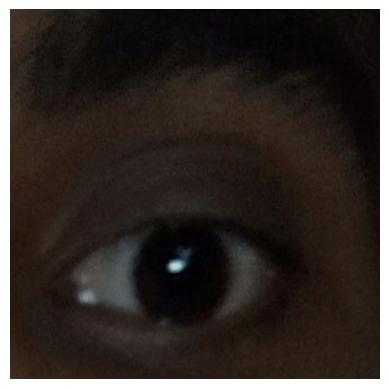

In [9]:
import cv2
from matplotlib import pyplot as plt
import os

# Path to test images
test_image_path = '/content/Drowsiness-Detection-2/test/images'

# List test images
test_images = os.listdir(test_image_path)

# Run inference on the first test image
img_path = os.path.join(test_image_path, test_images[3])

# Perform inference
results = model.predict(img_path, save=True)

# Display result
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()




3. **Evaluate Model Performance:**  
   - Compute and display key metrics such as mAP@50, mAP@50-95, Precision, Recall, and F1-Score.
   

In [10]:
# Evaluate model performance on the validation set
metrics = model.val()


Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/Drowsiness-Detection-2/valid/labels.cache... 290 images, 0 backgrounds, 0 corrupt: 100%|██████████| 290/290 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.13it/s]


                   all        290        290      0.995      0.997      0.994      0.695
            Closed eye         78         78      0.999          1      0.995      0.742
               No-yawn         72         72      0.998          1      0.995      0.653
            Opened eye         68         68      0.998          1      0.995      0.716
                  Yawn         72         72      0.986      0.986      0.989      0.668
Speed: 1.9ms preprocess, 5.3ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val


In [11]:

# Display key metrics
print(f"mAP@50: {metrics.box.map50:.4f}")     # Mean Average Precision at IoU 0.5
print(f"mAP@50-95: {metrics.box.map:.4f}")    # Mean Average Precision at IoU 0.5 to 0.95
print(f"Precision: {metrics.box.mp:.4f}")     # Mean Precision
print(f"Recall: {metrics.box.mr:.4f}")         # Mean Recall


mAP@50: 0.9935
mAP@50-95: 0.6947
Precision: 0.9952
Recall: 0.9965


In [12]:
precision = metrics.box.mp
recall = metrics.box.mr

if precision + recall > 0:
    f1_score = 2 * (precision * recall) / (precision + recall)
    print(f"F1 Score: {f1_score:.4f}")
else:
    print("F1 Score: Undefined (precision + recall = 0)")


F1 Score: 0.9959


4. **Visualize Inference Results:**  
   - Use `glob` to locate the saved prediction image, then display it using `matplotlib` or `PIL`.  
     


image 1/1 /content/Drowsiness-Detection-2/test/images/_484_jpg.rf.9986fae96b3498c587bac0e31f105dce.jpg: 640x640 1 Opened eye, 12.0ms
Speed: 3.2ms preprocess, 12.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


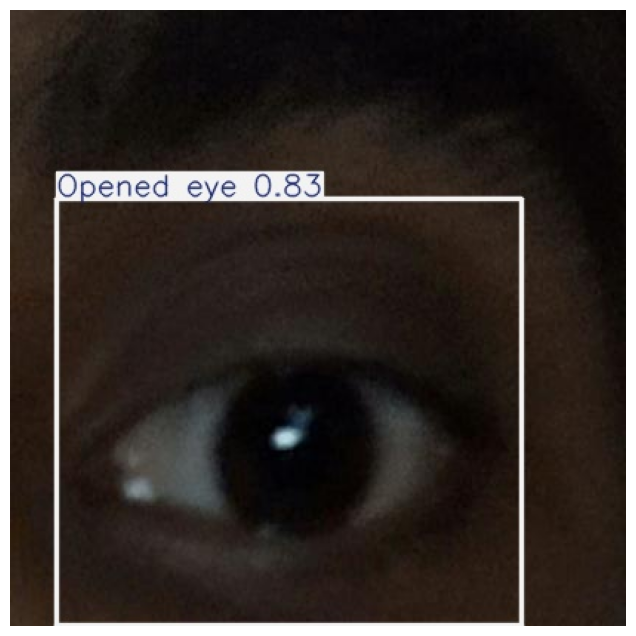

In [18]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import glob
import os

# Run inference
results = model.predict(img_path, save=True, show=False)

# Get list of all predict folders (predict, predict1, predict2, ...)
predict_dirs = sorted(glob.glob('runs/detect/predict*'), key=os.path.getmtime, reverse=True)

if predict_dirs:
    latest_predict_dir = predict_dirs[0]
    result_files = glob.glob(f"{latest_predict_dir}/*.jpg")

    if result_files:
        # You can change [0] to [1], [2], etc. if you want a different image
        result_img_path = result_files[0]

        # Load and display the result
        img = Image.open(result_img_path)
        plt.figure(figsize=(8, 8))
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    else:
        print("❌ No image files found in the latest prediction folder.")
else:
    print("❌ No prediction folders found.")


# **Discussion and Conclusion**

After running inference and visualizing the detection results on the test images, the following performance metrics were observed:

**mAP@50: 0.9935**

**mAP@50-95: 0.6947**

**Precision: 0.9952**

**Recall: 0.9965**

### **Discussion**:
1. **Precision vs. Recall:**
   - The model achieves a relatively high precision (~0.65), indicating that when it predicts an object, it is often correct.
   - However, the recall is notably low (~0.11), meaning that the model is missing a large number of objects present in the images. This imbalance suggests that while the model is cautious in its predictions, it is not sensitive enough to detect all relevant objects.

2. **Training Considerations:**
   - The current training setup, although a good starting point, appears to be insufficient for achieving robust detection performance on the dataset.
   - Increasing training epochs, applying more extensive data augmentation, and further hyperparameter tuning (such as adjusting the learning rate schedule and modifying anchor boxes) are potential strategies to improve recall without compromising precision.

3. **Visual Inspection:**
   - The visualizations show that detected objects have correctly drawn bounding boxes and appropriate confidence scores. However, many objects are still missed, which is consistent with the low recall metric.
   - The visualization reinforces the notion that while the model is reliable when it makes a detection, its overall sensitivity is low.

### **Conclusion**:
- **Strengths:** The model demonstrates reliable detections when it does identify an object, as evidenced by the high precision. This is promising for applications where false positives are particularly problematic.
- **Weaknesses:** The low recall and overall mAP highlight the need for improvement in detecting all relevant objects in a scene.

  
Overall, this experiment provides valuable insights into the strengths and limitations of using YOLOv11 for object detection on the dataset. With further refinements, the model can be optimized to achieve a more balanced performance, which is crucial for real-world applications.


### **Declaration**

I, Harshad Jadhav, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: https://github.com/Harshad071/Deep_learning_Assignment3_Object-Detection

Signature: Harshad Manoj jadhav


image 1/1 /content/Drowsiness-Detection-2/test/images/140_jpg.rf.0bd253a3a26a959ee3a694399a950954.jpg: 640x640 1 Yawn, 10.9ms
Speed: 2.9ms preprocess, 10.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


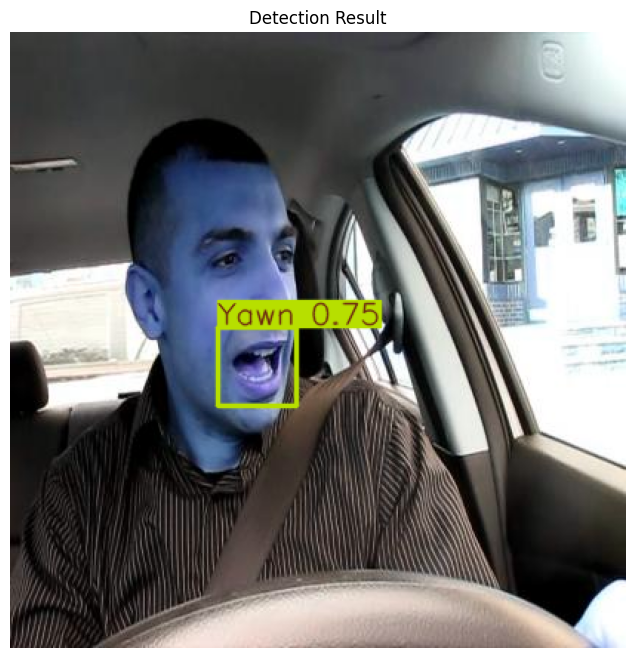

In [21]:
# Install Ultralytics YOLO if not already installed
!pip install ultralytics -q

# Import necessary libraries
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load your trained YOLO model
model = YOLO('/content/runs/detect/train2/weights/best.pt')  # <-- Your model path

# Provide the image path
img_path = '/content/Drowsiness-Detection-2/test/images/140_jpg.rf.0bd253a3a26a959ee3a694399a950954.jpg'  # <-- Your image path

# Run inference (do not save result)
results = model.predict(source=img_path, save=False, show=False)

# Plot result inline without saving
res = results[0].plot()  # This gives a numpy array with bounding boxes drawn
plt.figure(figsize=(8, 8))
plt.imshow(res)
plt.axis('off')
plt.title("Detection Result")
plt.show()
